In [1]:
## Start of Assignment 8
## Name: Tekuri Sai Akhil
## NetId: st5050

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

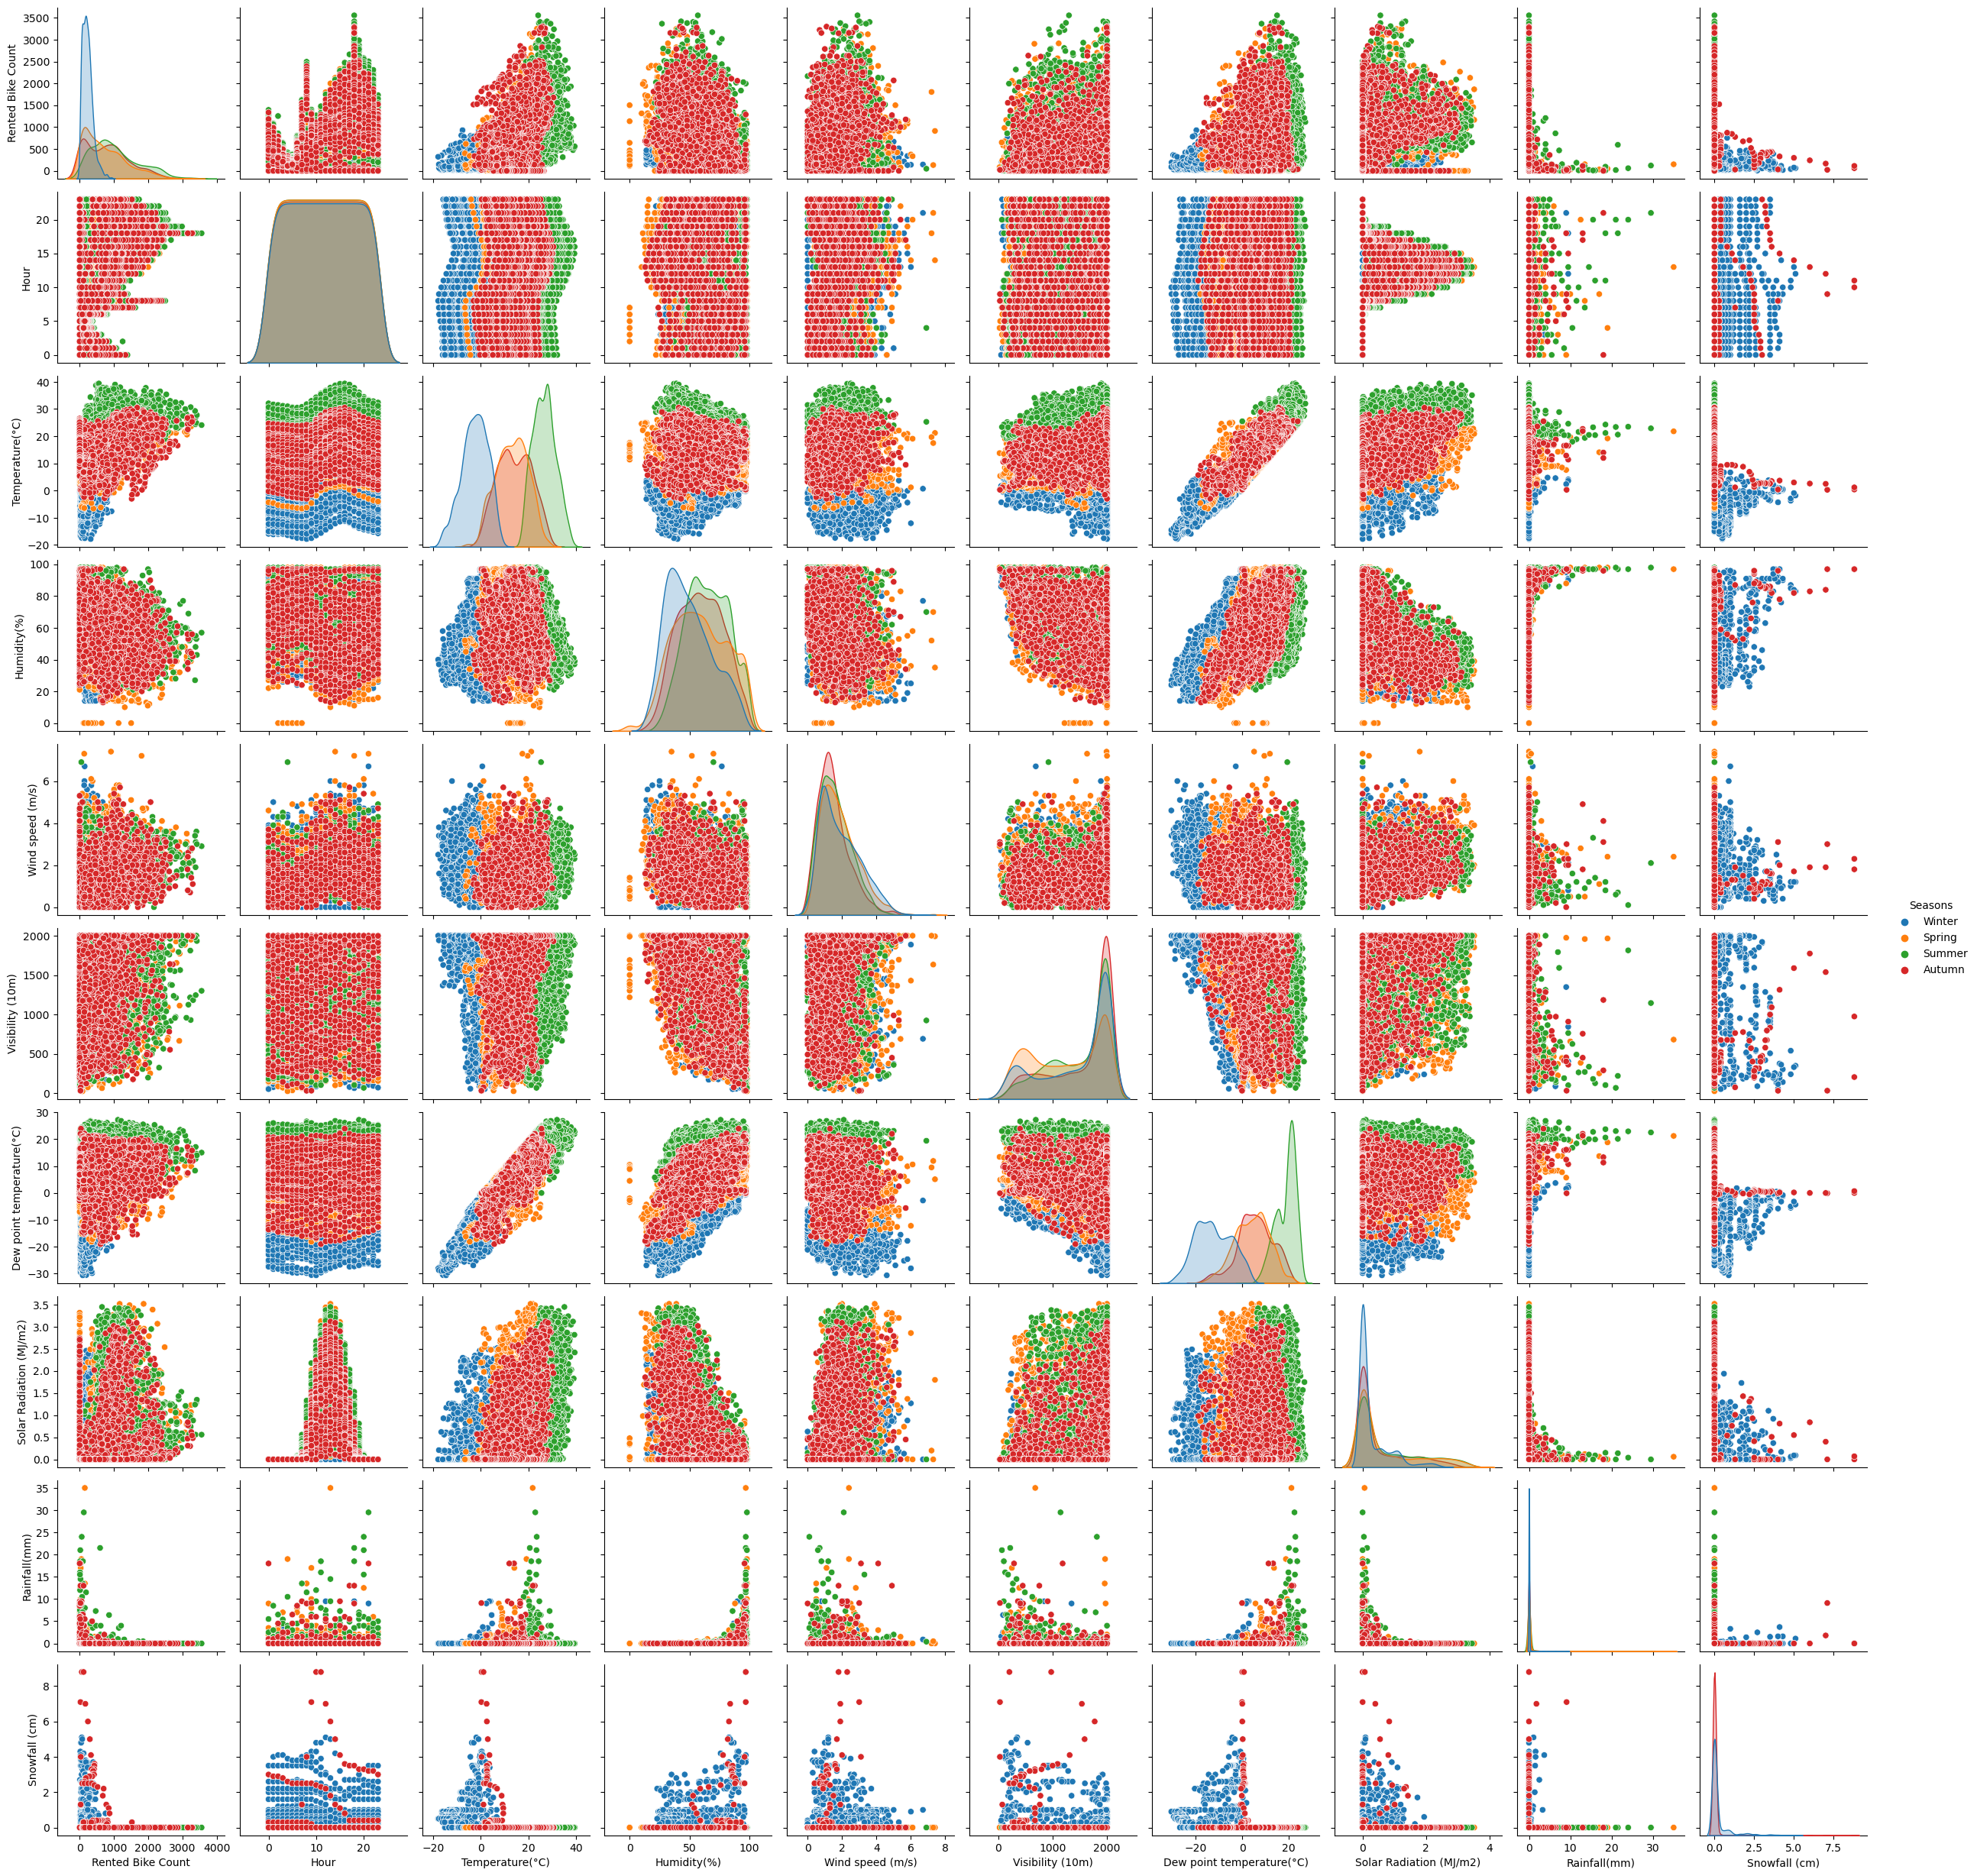

In [5]:
sns.pairplot(df,hue = 'Seasons')

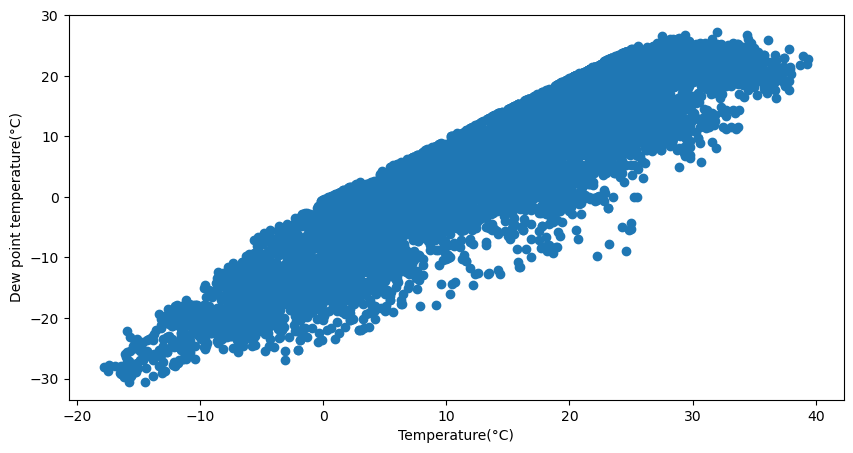

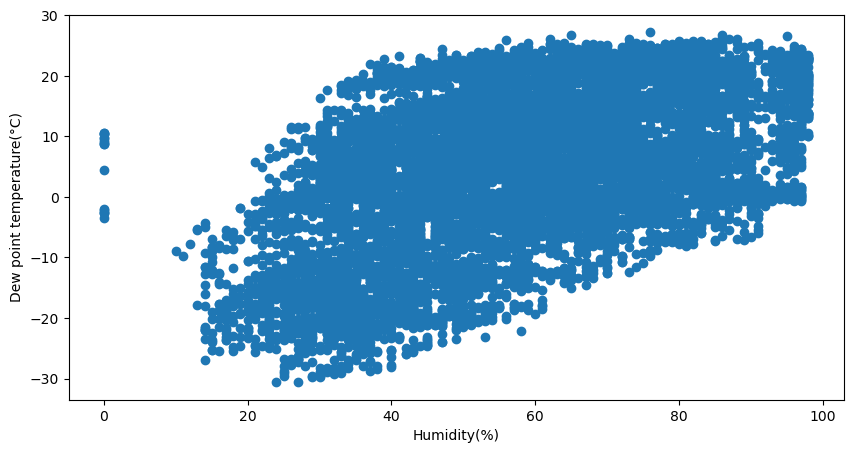

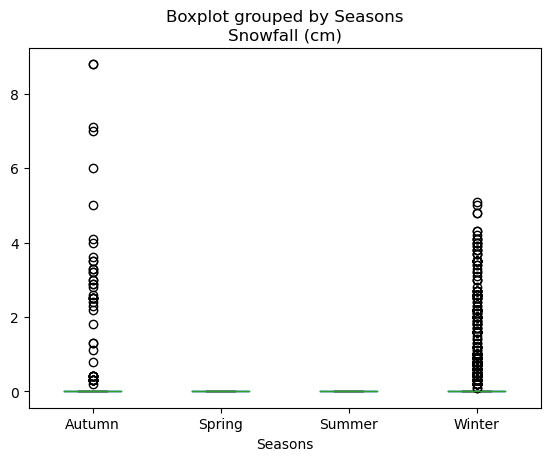

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['Temperature(°C)'], df['Dew point temperature(°C)'])
plt.xlabel('Temperature(°C)')
plt.ylabel('Dew point temperature(°C)')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(df['Humidity(%)'], df['Dew point temperature(°C)'])
plt.xlabel('Humidity(%)')
plt.ylabel('Dew point temperature(°C)')
plt.show()

df.boxplot(by ='Seasons', column =['Snowfall (cm)'], grid = False)
plt.show()

In [7]:
print("1) We can see that Temperature(°C), Dew point temperature(°C) are highly correlated")
print("2) We can see that Humidity(%), Dew point temperature(°C) are slightly correlated seasonal wise")

1) We can see that Temperature(°C), Dew point temperature(°C) are highly correlated
2) We can see that Humidity(%), Dew point temperature(°C) are slightly correlated seasonal wise


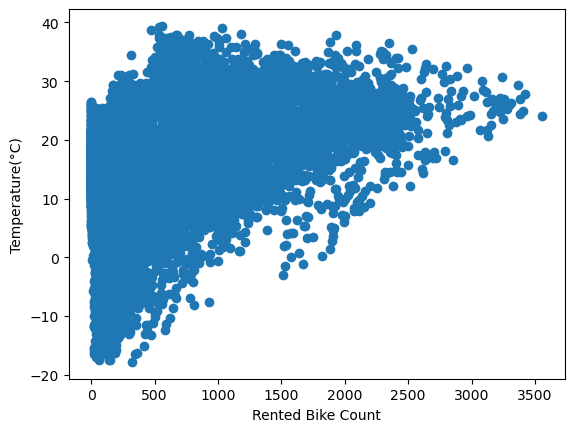

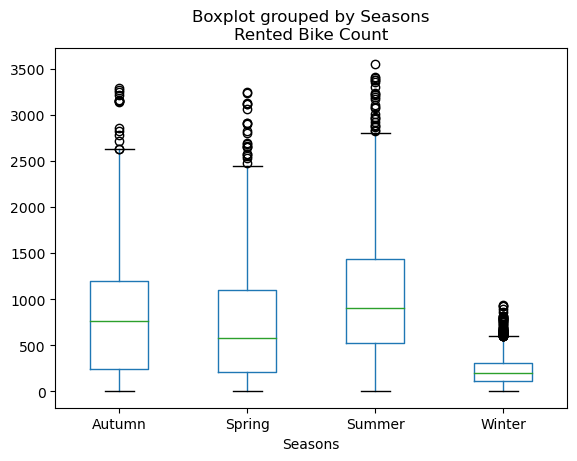

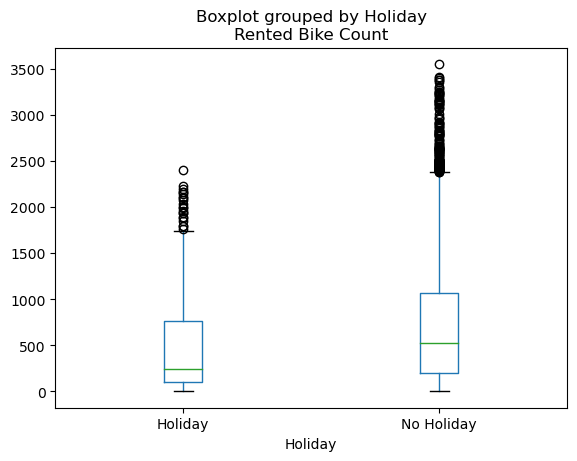

In [8]:
plt.scatter(df['Rented Bike Count'], df['Temperature(°C)'])
plt.xlabel('Rented Bike Count')
plt.ylabel('Temperature(°C)')
plt.show()

df.boxplot(by ='Seasons', column =['Rented Bike Count'], grid = False)
plt.show()

df.boxplot(by ='Holiday', column =['Rented Bike Count'], grid = False)
plt.show()

In [9]:
print("1) During winter season, the rented bike count is small compated to other seasons")

1) During winter season, the rented bike count is small compated to other seasons


In [10]:
Y = df['Rented Bike Count']
df = df.drop(['Rented Bike Count'],axis =1)
Holiday_enc = pd.DataFrame(np.where(df['Holiday']=='Holiday', 1, -1))
Functioning_Day_enc = pd.DataFrame(np.where(df['Functioning Day']=='Yes', 1, -1))
df = df.drop(['Holiday', 'Functioning Day'], axis = 1)

Season = np.array(df['Seasons']).reshape(-1, 1)
enc = OneHotEncoder(handle_unknown='ignore')
Season_enc = enc.fit_transform(Season)
Season_enc = pd.DataFrame(Season_enc.toarray())

df[['day', 'month', 'year']] = df['Date'].str.split('/', expand=True)

df = df.drop(['Seasons','Date'], axis = 1)

# scaler = StandardScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df)

X = pd.concat([df, Season_enc, Holiday_enc, Functioning_Day_enc], axis=1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X) , np.array(Y), test_size = 0.2, random_state = 42)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
train_score = lin_reg.score(X_train, Y_train)
test_score = lin_reg.score(X_test, Y_test)

In [13]:
print("LinearRegression: ")
print("    train score = " + str(train_score))
print("    test score = " + str(test_score))

LinearRegression: 
    train score = 0.5586908577971317
    test score = 0.5343001653095483


In [14]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_hat = rf.predict(X_test)

errors = abs(Y_hat - Y_test)
acc = 1 - errors
train_score = rf.score(X_train, Y_train)
test_score = rf.score(X_test, Y_test)

In [15]:
print("RandomForestRegressor: ")
print("    train score = " + str(train_score))
print("    test score = " + str(test_score))

RandomForestRegressor: 
    train score = 0.9836994410832148
    test score = 0.8716463235481101


In [16]:
print("1) The test r2_score on linear regression model is 0.53")
print("2) The test r2_score on RandomForest model is 0.87")
print("3) In this case the random forest model did a good job in predicting the test data")
print("4) As we can see above from the correlations the relation between features and the outcome variable is non-linear")
print("5) Therefore we is linear regression model is expected to perform poorly with this data")
print("6) While Random forest model can model non-linearity, therefore we can see high accuracy when using random forest model")

1) The test r2_score on linear regression model is 0.53
2) The test r2_score on RandomForest model is 0.87
3) In this case the random forest model did a good job in predicting the test data
4) As we can see above from the correlations the relation between features and the outcome variable is non-linear
5) Therefore we is linear regression model is expected to perform poorly with this data
6) While Random forest model can model non-linearity, therefore we can see high accuracy when using random forest model


In [17]:
## End of Assignment 8